# Image Convolution using Tensorflow

In [2]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

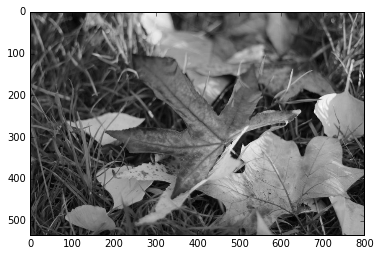

In [3]:
im = Image.open('./images/leaf.jpg')
im_gray = im.convert('L')

img = np.asarray(im_gray, dtype=np.float32)

implot = plt.imshow(img)
implot.set_cmap('gray')

In [4]:
# Normalize image
img = img / np.max(img[:])

In [5]:
print(img.shape)

(534, 800)


In [6]:
kernel = np.array([[-2., 0., 2.], [-2., 0., 2.], [-2., 0., 2.]], dtype=np.float32)

tf_4d_data = tf.reshape(img, [1, img.shape[0], img.shape[1], 1])
tf_4d_kernel = tf.reshape(kernel, [kernel.shape[0], kernel.shape[1], 1, 1])

input = tf.Variable(tf_4d_data)
filter = tf.Variable(tf_4d_kernel)

conv1 = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='VALID')
conv2 = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='SAME')

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

    result1 = sess.run(conv1)
    result2 = sess.run(conv2)

In [7]:
valid_x, valid_y = (img.shape[0] - kernel.shape[0] + 1), (img.shape[1] - kernel.shape[1] + 1)
same_x, same_y = img.shape[0], img.shape[1]

print(valid_x, valid_y)
print(same_x, same_y)

532 798
534 800


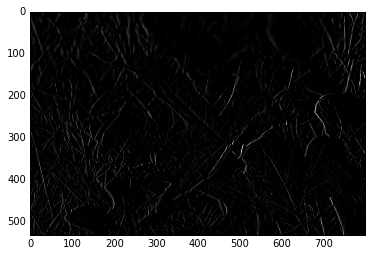

In [8]:
# plot result of convolution with VALID mode
r = np.reshape(result1, [valid_x, valid_y])
r[r < 0] = 0
r = np.multiply(r, 255)
implot = plt.imshow(r)
implot.set_cmap('gray')

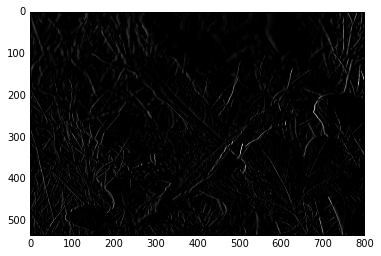

In [9]:
# plot result of convolution with SAME mode
r = np.reshape(result2, [same_x, same_y])
r[r < 0] = 0
r = np.multiply(r, 255)
implot = plt.imshow(r)
implot.set_cmap('gray')